<h2 style="color:crimson">Tarea 5 - Joaquín Trejo</h2>

**1. Crea un pipeline llamado** `model` **que primero transforme el espacio con un polinomio de grado 30 (sin incluir p0) y, posteriormente, considere la transformación de los datos con una regresión logística sin regularización** (`LogisticRegression(penalty="none")`)

In [1]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
import sys
sys.path.append("utils.py")
import utils
from sklearn.metrics import f1_score

**2. Realiza un _Bagging Classifer_ de**  `model` **llamado** `bagging_logreg` **con** `n_estimators=100` **y** `random_state=314`**

In [2]:
model = Pipeline([
    ("poly_features", PolynomialFeatures(degree=30, include_bias = False)),
    ("log_reg",LogisticRegression(penalty="none",solver="newton-cg"))
])

bagging_logreg = BaggingClassifier(model, n_estimators=100,
                                  bootstrap=True, max_samples=100, n_jobs=-1,
                                  oob_score=True, random_state=314)


**3. Entrena** `model` **y** `bagging_logreg` **considerando** `X` **y** `y` **definido arriba**

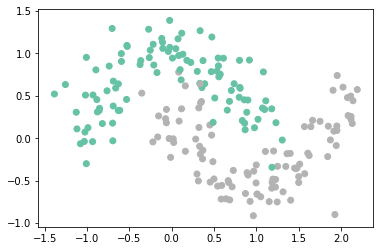

In [3]:
noise = 0.2
X, y = make_moons(200, noise=noise, random_state=2718)
X_test, y_test = make_moons(40, noise=noise,
                            random_state=31415)
plt.scatter(*X.T, c=y, cmap="Set2")

In [6]:
model.fit(X,y)
bagging_logreg.fit(X,y)

/Users/joaquinguillermotrejoberriel/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


BaggingClassifier(base_estimator=Pipeline(memory=None,
                                          steps=[('poly_features',
                                                  PolynomialFeatures(degree=30,
                                                                     include_bias=False,
                                                                     interaction_only=False,
                                                                     order='C')),
                                                 ('log_reg',
                                                  LogisticRegression(C=1.0,
                                                                     class_weight=None,
                                                                     dual=False,
                                                                     fit_intercept=True,
                                                                     intercept_scaling=1,
                                                 

**4. Grafica la función de decisión dada por** `model` **y por** `bagging_logreg` **¿Qué observas?**

Se puede observar que al utlizar Bagging, se presenta un overfitting


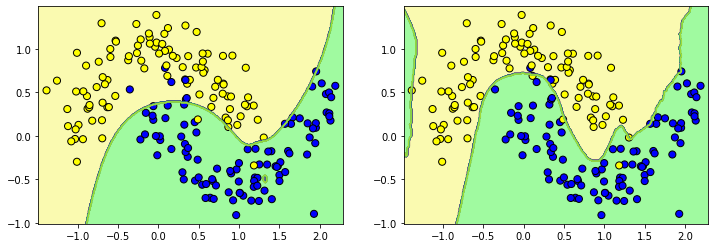

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

utils.plot_classf_model(X, y, model, ax=ax[0], contour=True)
utils.plot_classf_model(X, y, bagging_logreg, ax=ax[1], contour=True)


print("Se puede observar que al utlizar Bagging, se presenta un overfitting")

**5. Considerando un** `f1_score` **(dentro de** `sklearn.metrics`**), calcula el** f1-score **sobre el test set** (`X_test`, `y_test`) **considerando** `model` **y** `bagging_logreg`**. ¿Qué resultados arroja?**

In [10]:
y_predict_model = model.predict(X_test)
y_predict_bagging_logreg = bagging_logreg.predict(X_test)
y_true = y_test
f1_score_model = f1_score(y_true,y_predict_model)
f1_score_bagging_logreg = f1_score(y_true,y_predict_bagging_logreg)

print(f"f1_score_model = {f1_score_model}")
print(f"f1_score_bagging_logreg = {f1_score_bagging_logreg}")

f1_score_model = 0.9230769230769231
f1_score_bagging_logreg = 0.9268292682926829
